In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn.neural_network   import MLPClassifier

In [2]:
# import data

train = pd.read_csv("./train-data.csv")
test = pd.read_csv("./test-data.csv")

# Exploratory Analysis

In [3]:
# print head of training dataset
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
# print size of train dataset
train.shape

(15120, 56)

In [5]:
# Count number of null
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [6]:
# print statistic for each columns
for i in train.columns:
    print("Columns "+str(i))
    print(train[i].describe())
    print("----------------------")

Columns Id
count    15120.00000
mean      7560.50000
std       4364.91237
min          1.00000
25%       3780.75000
50%       7560.50000
75%      11340.25000
max      15120.00000
Name: Id, dtype: float64
----------------------
Columns Elevation
count    15120.000000
mean      2749.322553
std        417.678187
min       1863.000000
25%       2376.000000
50%       2752.000000
75%       3104.000000
max       3849.000000
Name: Elevation, dtype: float64
----------------------
Columns Aspect
count    15120.000000
mean       156.676653
std        110.085801
min          0.000000
25%         65.000000
50%        126.000000
75%        261.000000
max        360.000000
Name: Aspect, dtype: float64
----------------------
Columns Slope
count    15120.000000
mean        16.501587
std          8.453927
min          0.000000
25%         10.000000
50%         15.000000
75%         22.000000
max         52.000000
Name: Slope, dtype: float64
----------------------
Columns Horizontal_Distance_To_Hydrology

In [7]:
# print Soil_Type with only 0
for i in train.columns:
    if train[i].describe()['max'] == train[i].describe()['min']:
        print("Columns "+str(i)+" "+str(train[i].describe()['max']))
        print("----------------------")

Columns Soil_Type7 0.0
----------------------
Columns Soil_Type15 0.0
----------------------


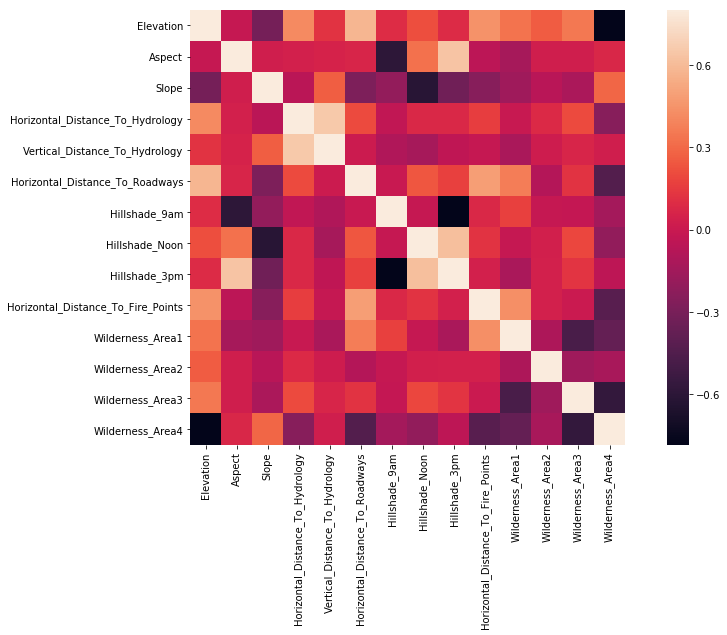

In [8]:
# Print correlation matrix to see if there is strong correlation between columns
corrmat = train.iloc[:,1:15].corr()
plt.subplots(figsize = (15,8))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [9]:
# Select some features

c = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','Cover_Type']
c2 = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

CLASS 5


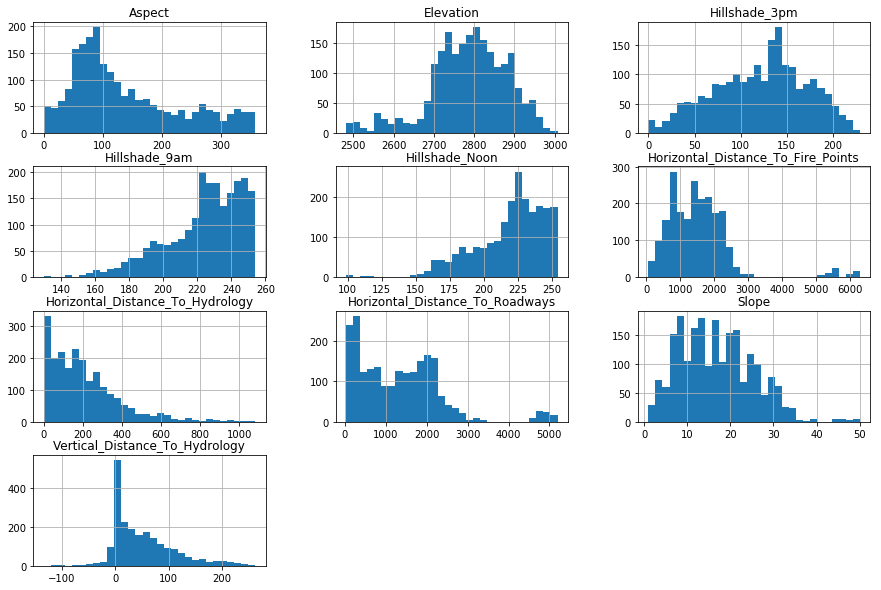

CLASS 2


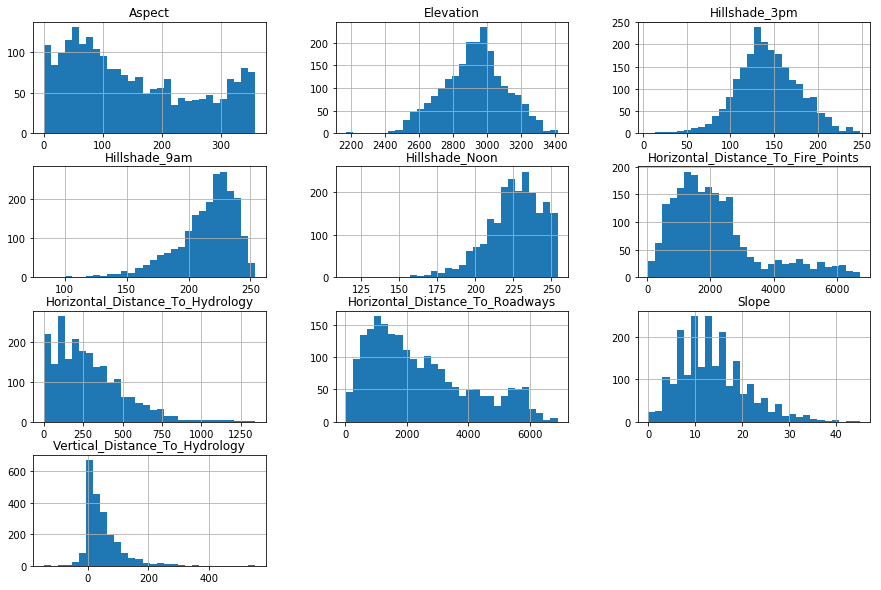

CLASS 1


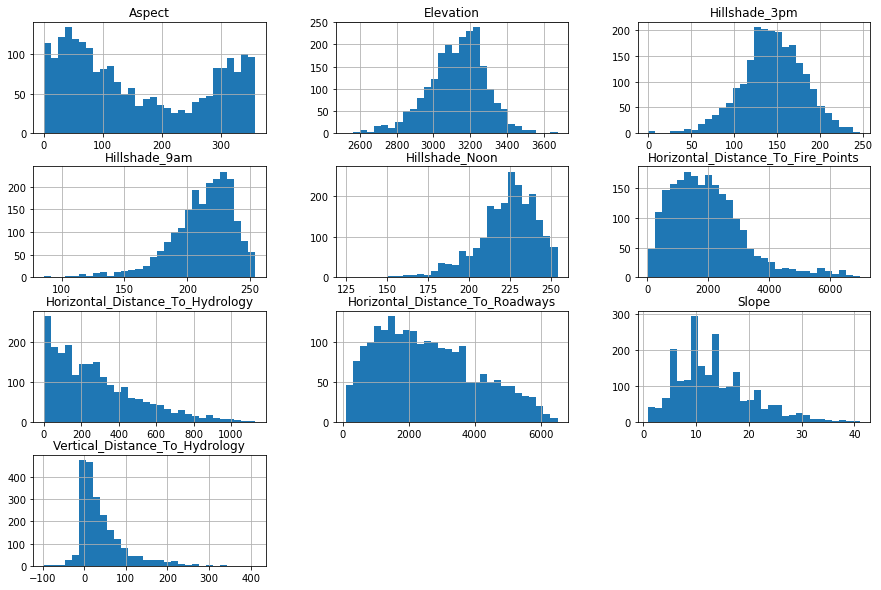

CLASS 7


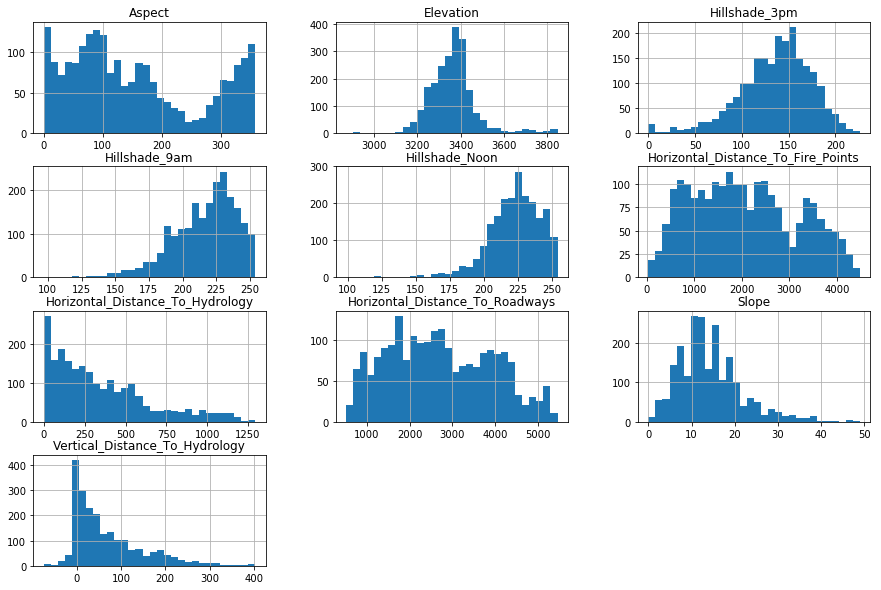

CLASS 3


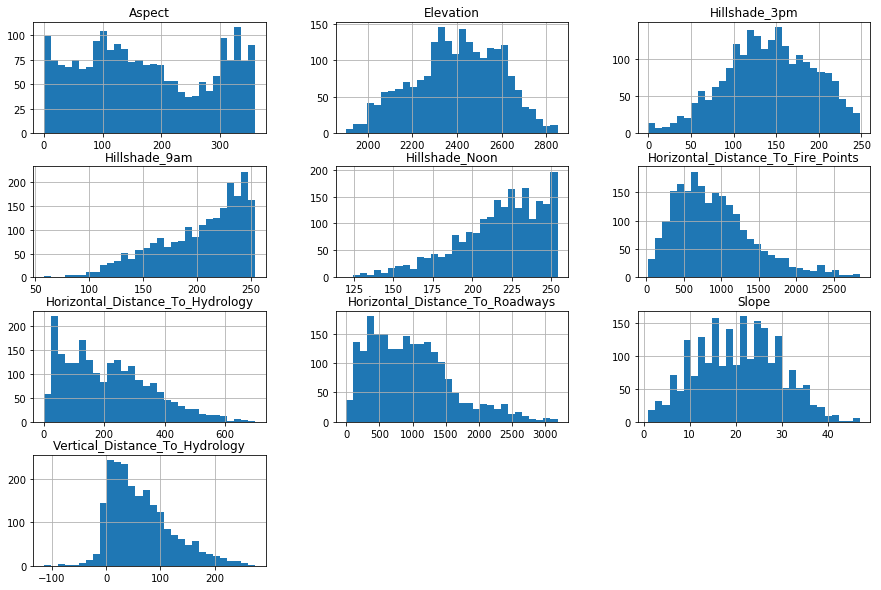

CLASS 6


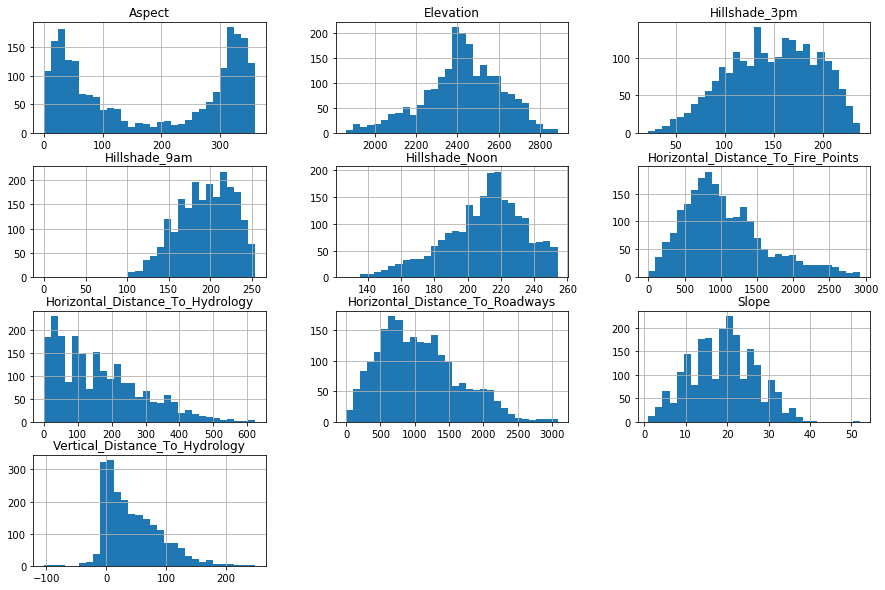

CLASS 4


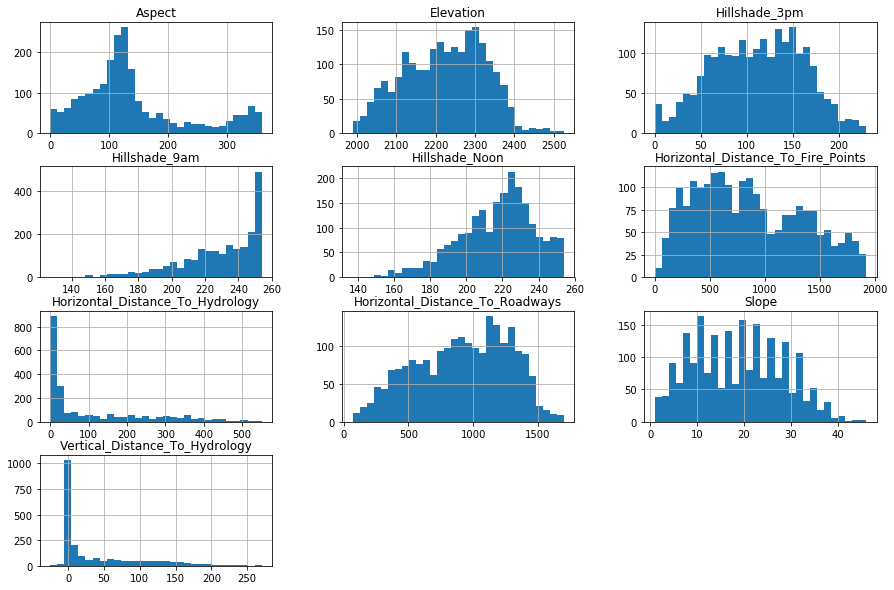

In [10]:
# Histogram of columns for each Cover_Type  
for i in train['Cover_Type'].unique():
    print("CLASS "+str(i))
    train[train['Cover_Type'] == i][c2].hist(figsize = (15, 10),bins =30)
    plt.show()

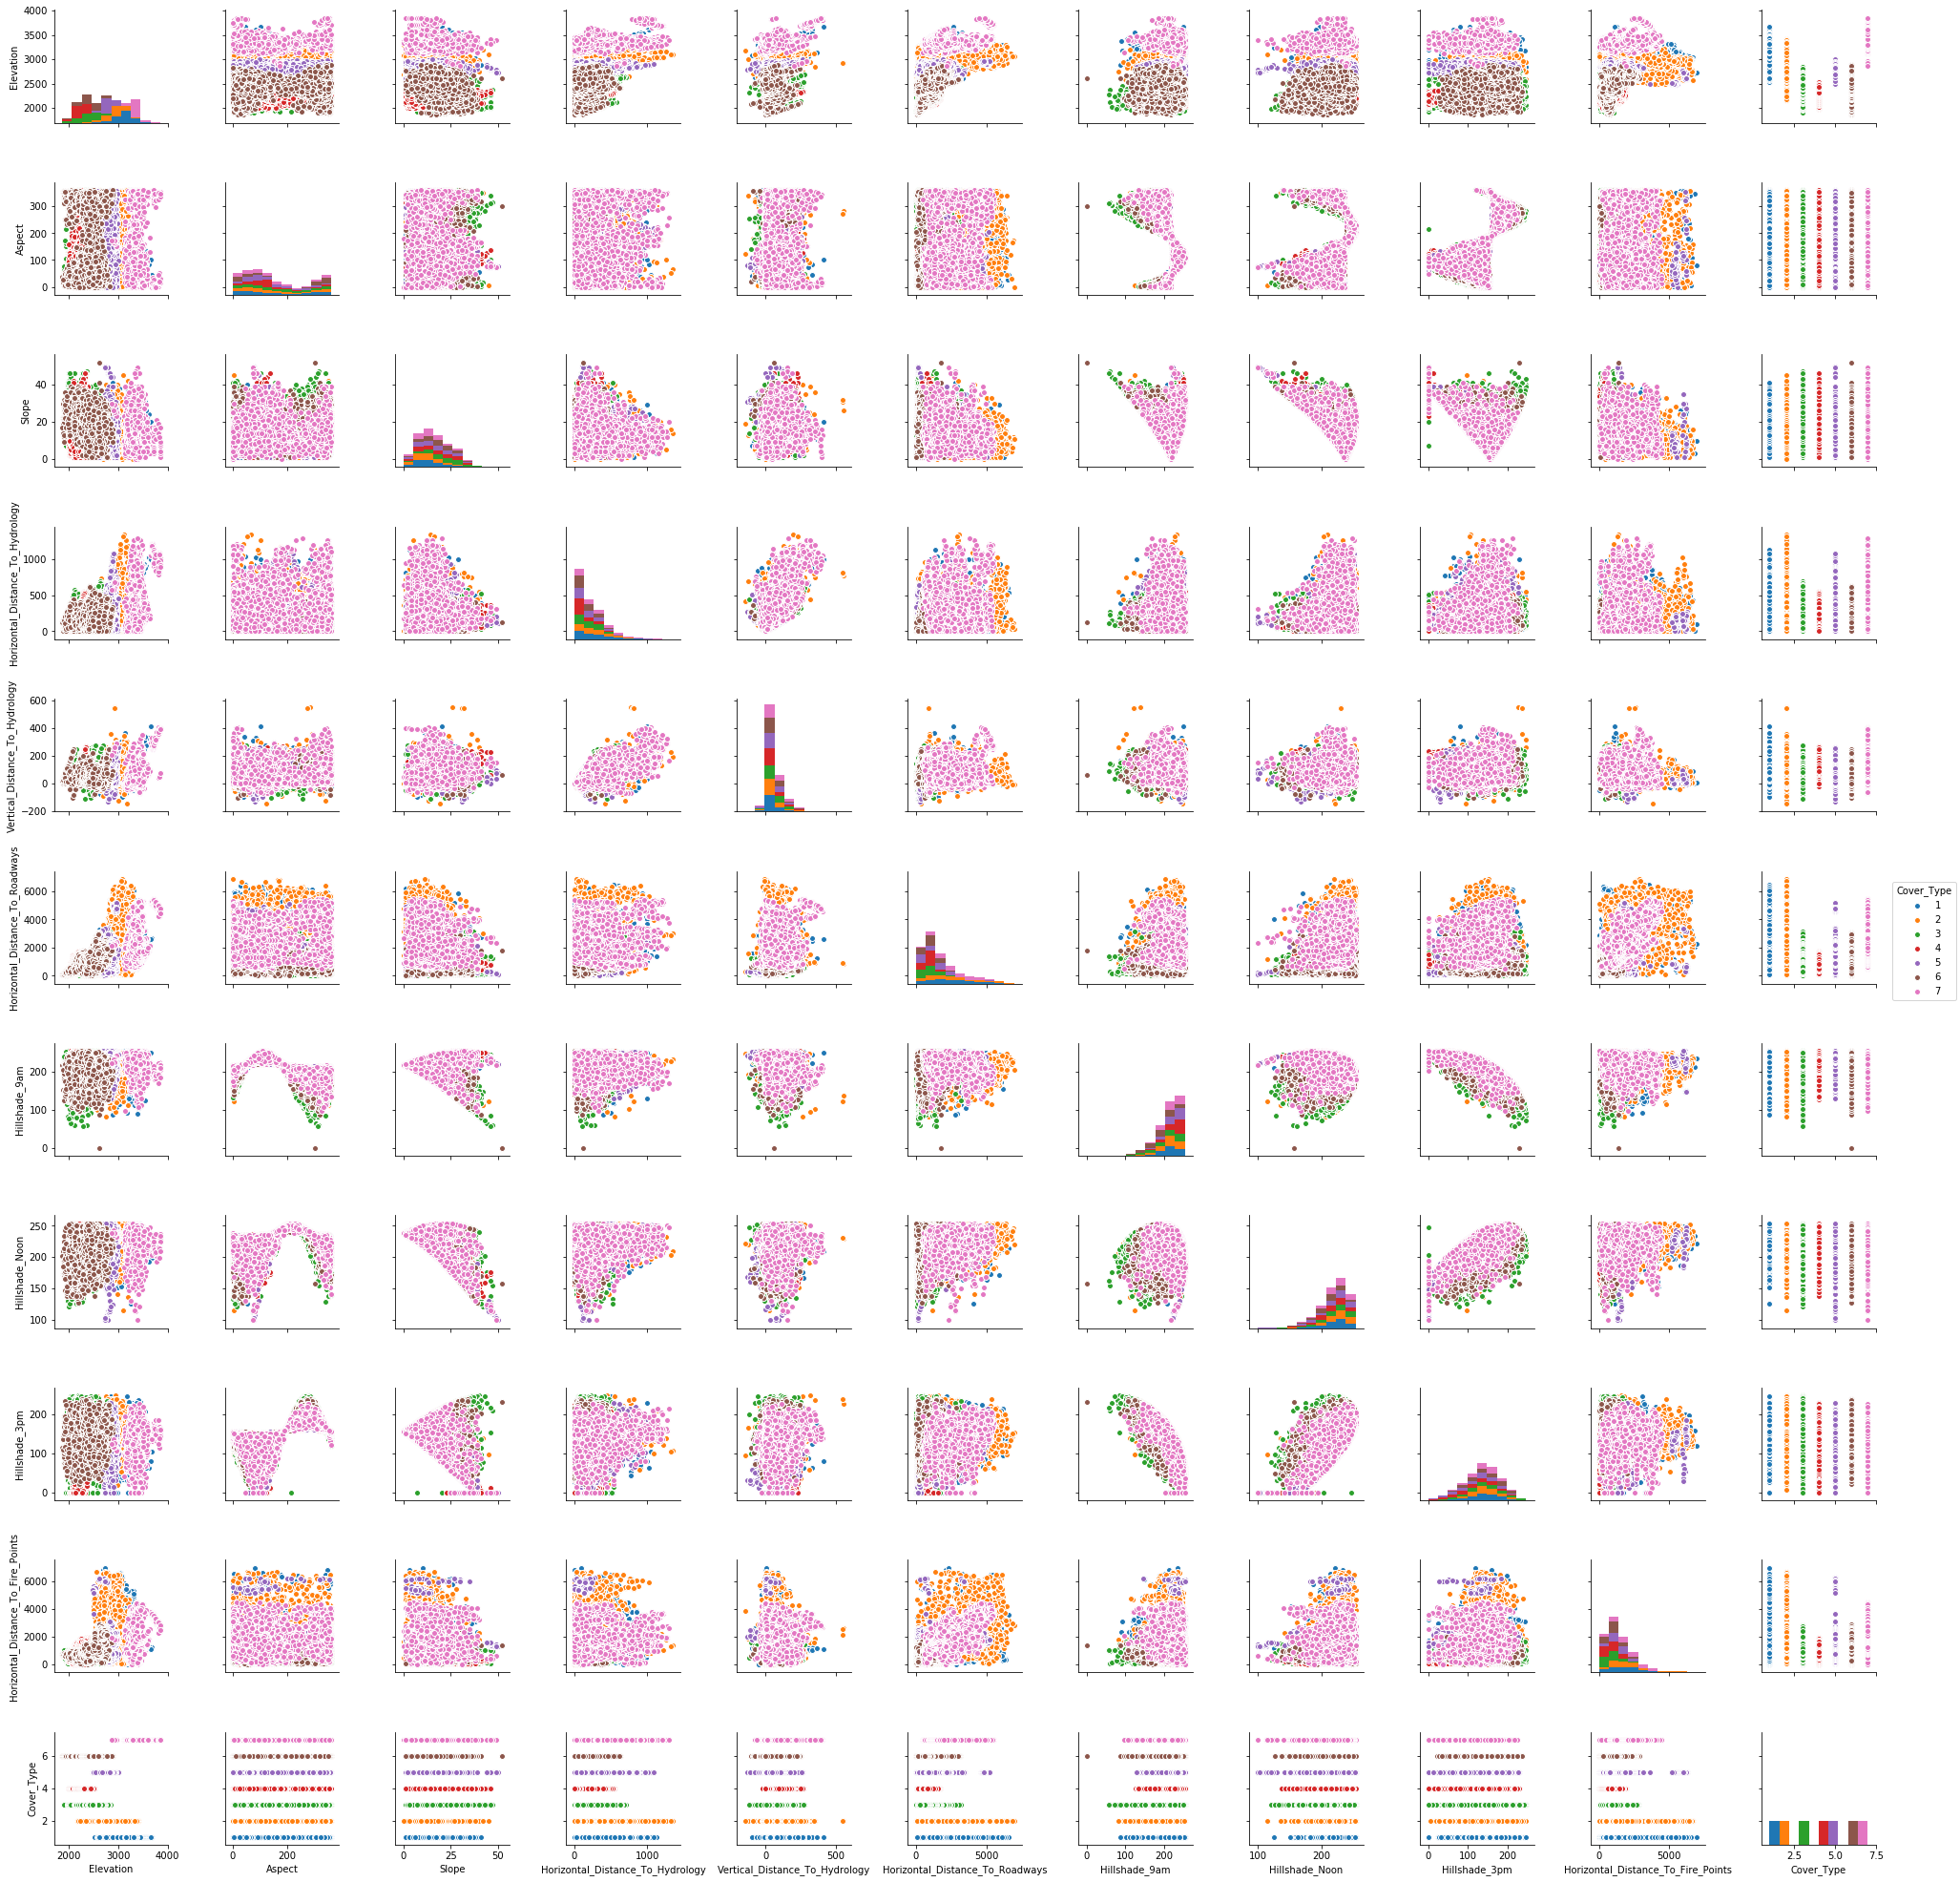

In [11]:
# Pairplot
sns.pairplot(data=train[c],hue='Cover_Type')
plt.show()

In [12]:
# Count classes
train['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

# Test Models

In this part, I tried some classification models that I selected based on the problem to test without feature engineering.
As I saw just below in the exploratory analysis there is no "easy" way to distinct each classes so I decided to try 3 models : SVM that is recommanded for this kind of classification, MLP Classifier and KNN that is "simple" but can be a good classifier. 

In [13]:
# Select some features

features = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

In [14]:
X = train[features].values
y = train['Cover_Type'].values

In [15]:
# Split train set in train and test subset to train and test model
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3, random_state=0)

## SVM

In [16]:
# Try to find the best params for the SVM

tuned_parameters = [{'gamma': [1e-5,1e-3],
                     'C': [1,5,10]}]

scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=10, n_jobs=-1,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 1e-05}

Grid scores on development set:

0.822 (+/-0.017) for {'C': 1, 'gamma': 1e-05}
0.837 (+/-0.030) for {'C': 1, 'gamma': 0.001}
0.845 (+/-0.018) for {'C': 5, 'gamma': 1e-05}
0.836 (+/-0.030) for {'C': 5, 'gamma': 0.001}
0.848 (+/-0.016) for {'C': 10, 'gamma': 1e-05}
0.836 (+/-0.030) for {'C': 10, 'gamma': 0.001}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          1       0.76      0.73      0.75       646
          2       0.73      0.66      0.70       644
          3       0.84      0.84      0.84       659
          4       0.92      0.97      0.95       642
          5       0.90      0.94      0.92       622
          6       0.86      0.85      0.86       671
          7       0.92      0.97      0.94       652

avg / total

In [17]:
# Fit with a subset of the train set

sv = svm.SVC(C=10,gamma=1e-05, kernel='rbf',class_weight='balanced')
sv.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# Creation of dataframe to save result of the prediction

data = pd.DataFrame()
data['prediction'] = sv.predict(X_test)
data['y'] = y_test

In [19]:
# Print accuracy and F1 score on the train set 

print(accuracy_score(data['prediction'], data['y'])) 
print(f1_score(data['prediction'], data['y'], average='macro'))

0.852072310406
0.850055344687


In [20]:
# Fit with all the train set

sv = svm.SVC(C=10,gamma=1e-05, kernel='rbf',class_weight='balanced')
sv.fit(train[features],train['Cover_Type'])

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
# Creation of dataframe to save result of the prediction

result = pd.DataFrame()
result['Id'] = test['Id']
result['Cover_Type'] = sv.predict(test[features])

In [22]:
# Export to CSV

result.to_csv("./res_final_SVM.csv",header=True,index=False)

## MLP

In [23]:
# Scale data to train MLP classifier

scaler = StandardScaler()
scaler.fit(X_train)
X_trainsc = scaler.transform(X_train)
X_testsc = scaler.transform(X_test)

/Users/maxime/anaconda/envs/python36/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
# Fit MLPClassifier with params I found with gridsearch on another notebook.

mlp = MLPClassifier(activation='relu',solver='lbfgs', alpha=10,hidden_layer_sizes=(500,500), random_state=1)
mlp.fit(X_trainsc,y_train)

MLPClassifier(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 500), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [25]:
# Predict and store result in DataFrame

data = pd.DataFrame()
data['prediction'] = mlp.predict(X_testsc)
data['y'] = y_test

In [26]:
# Print accuracy and F1 score on the train set 

print(accuracy_score(data['prediction'], data['y'])) 
print(f1_score(data['prediction'], data['y'], average='macro'))

0.82848324515
0.827433928115


## KNN

In [27]:
# Fit KNN Classifier 

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [28]:
# Predict and store result in DataFrame

data = pd.DataFrame()
data['prediction'] = knn.predict(X_test)
data['y'] = y_test

In [29]:
# Print accuracy and F1 score on the train set

print(accuracy_score(data['prediction'], data['y'])) 
print(f1_score(data['prediction'], data['y'], average='macro'))

0.837081128748
0.833954169673


So without features engineering I have score near 0.7 that is not bad but with some features engineering I can maybe improve this score. I can see that SVM seems to be the best model becuse it seems that KNN and MLP overfit whereas the SVM is quite good.

# Feature Engineering

In this part, I tried some operations on differents columns to increase my score and then test it with two algotithms I choose for their performance without feature engineering : SVM & KNN.

In [30]:
# Copy train & test for modification

ctrain = train.copy()
ctest = test.copy()

Compute Distance to hydrologie

In [31]:
ctrain['slope_hyd'] = np.sqrt(ctrain['Vertical_Distance_To_Hydrology']**2 + \
                                ctrain['Horizontal_Distance_To_Hydrology']**2) 
ctrain['slope_hyd'] = ctrain['slope_hyd'].map(lambda x: 0 if np.isinf(x) else x)
ctest['slope_hyd'] = np.sqrt(ctest['Vertical_Distance_To_Hydrology']**2 + \
                                ctest['Horizontal_Distance_To_Hydrology']**2) 
ctest['slope_hyd']=ctest['slope_hyd'].map(lambda x: 0 if np.isinf(x) else x) 

Compute Elevation with Horizontal_Distance_To_Hydrology

In [32]:
ctrain['Elev_to_HD_Hyd']=ctrain['Elevation'] - 0.2*ctrain['Horizontal_Distance_To_Hydrology']
ctest['Elev_to_HD_Hyd']=ctest['Elevation'] - 0.2*ctest['Horizontal_Distance_To_Hydrology']

Compute Elevation with Horizontal_Distance_To_Roadways

In [33]:
ctrain['Elev_to_HD_Road']=ctrain['Elevation'] - 0.2*ctrain['Horizontal_Distance_To_Roadways']
ctest['Elev_to_HD_Road']=ctest['Elevation'] - 0.2* ctest['Horizontal_Distance_To_Roadways']

Compute Elevation with Vertical_Distance_To_Hydrology

In [34]:
ctrain['Elev_to_VD_Hyd']=ctrain['Elevation'] - ctrain['Vertical_Distance_To_Hydrology']
ctest['Elev_to_VD_Hyd']=ctest['Elevation'] - ctest['Vertical_Distance_To_Hydrology']

Compute Mean of horizontal distance

In [35]:
ctrain['Mean_Amenities']=(ctrain['Horizontal_Distance_To_Fire_Points'] + ctrain['Horizontal_Distance_To_Hydrology'] + \
                            ctrain['Horizontal_Distance_To_Roadways']) / 3 
ctest['Mean_Amenities']=(ctest['Horizontal_Distance_To_Fire_Points'] + ctest['Horizontal_Distance_To_Hydrology'] + \
                            ctest['Horizontal_Distance_To_Roadways']) / 3 

Compute mean horizontal distance with fire points and hydrologiy

In [36]:
ctrain['Mean_Fire_Hyd']=(ctrain['Horizontal_Distance_To_Fire_Points'] + ctrain['Horizontal_Distance_To_Hydrology']) / 2 
ctest['Mean_Fire_Hyd']=(ctest['Horizontal_Distance_To_Fire_Points'] + ctest['Horizontal_Distance_To_Hydrology']) / 2

Add a new column with 1 if x > 0 else 0

In [37]:
ctrain['Highwater'] = ctrain['Vertical_Distance_To_Hydrology'].apply(lambda x : 1 if x > 0 else 0)
ctest['Highwater'] = ctest['Vertical_Distance_To_Hydrology'].apply(lambda x : 1 if x > 0 else 0)

Group Wilderness_Area in only one columns

In [38]:
Wilderness_Area = []
for i in ctrain.itertuples():
    if i[12] == 1:
        Wilderness_Area.append(0)
    elif i[13] == 1:
        Wilderness_Area.append(1)
    elif i[14] == 1:
        Wilderness_Area.append(2)
    elif i[15] == 1:
        Wilderness_Area.append(3)

In [39]:
Wilderness_Area_test = []
for i in ctest.itertuples():
    if i[12] == 1:
        Wilderness_Area_test.append(0)
    elif i[13] == 1:
        Wilderness_Area_test.append(1)
    elif i[14] == 1:
        Wilderness_Area_test.append(2)
    elif i[15] == 1:
        Wilderness_Area_test.append(3)

Group Soil_Type in only one columns

In [40]:
Soil_Type = []
for i in ctrain[['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
             'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8',
             'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
             'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
             'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
             'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
             'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
             'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
             'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
             'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']].itertuples():
    cpt = 0
    for j in i[1:]:
        if j == 1:
            break
        cpt+=1
    Soil_Type.append(cpt)

In [41]:
Soil_Type_test = []
for i in ctest[['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
             'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8',
             'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
             'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
             'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
             'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
             'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
             'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
             'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
             'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']].itertuples():
    cpt = 0
    for j in i[1:]:
        if j == 1:
            break
        cpt+=1
    Soil_Type_test.append(cpt)

In [42]:
# Add new columns

ctrain['Wilderness_Area'] = Wilderness_Area
ctrain['Soil_Type'] = Soil_Type
ctest['Wilderness_Area'] = Wilderness_Area_test
ctest['Soil_Type'] = Soil_Type_test

In [43]:
# Select features

features2 = ['Elevation', 'Aspect', 'Slope',
             'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
             'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
             'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'slope_hyd', 
             'Elev_to_HD_Hyd', 'Elev_to_HD_Road', 'Elev_to_VD_Hyd',
             'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
             'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
             'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8',
             'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
             'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
             'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
             'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
             'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
             'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
             'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
             'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40','Highwater']

features2b = ['Elevation', 'Aspect', 'Slope',
             'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
             'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
             'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'slope_hyd', 
             'Elev_to_HD_Hyd', 'Elev_to_HD_Road', 'Elev_to_VD_Hyd', 'Wilderness_Area',
            'Soil_Type','Highwater']

In [44]:
# Split train set to train and test modele 

X_train, X_test, y_train, y_test = train_test_split(
    ctrain[features2b],ctrain['Cover_Type'],test_size=0.3, random_state=0)

## SVM

Computation of the SVM with the feature engineering

In [45]:
sv = svm.SVC(C=10,gamma=1e-5, kernel='rbf')
sv.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
data = pd.DataFrame()
data['prediction'] = sv.predict(X_test)
data['y'] = y_test.values

In [47]:
print(accuracy_score(data['prediction'], data['y'])) 
print(f1_score(data['prediction'], data['y'], average='macro'))

0.869488536155
0.867934664559


In [48]:
sv = svm.SVC(C=10,gamma=1e-5, kernel='rbf')
sv.fit(ctrain[features2b],ctrain['Cover_Type'])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
result = pd.DataFrame()
result['Id'] = test['Id']
result['Cover_Type'] = sv.predict(ctest[features2b])

In [50]:
result.to_csv("./res_final_svm_fe.csv",header=True,index=False)

# Weigthed SVM

When I predict on the test set with SVM, I saw that classes are unbalanced there is a lot of 2 and 1 but few of 4 and 7. So the idea here is to train the model with more weights on 1 and 2 and less on the others.

Computation of the class weights

In [60]:
for i in range(1,4):
    print(i)
    print(result['Cover_Type'].value_counts()[i]/20000)
for i in range(5,8):
    print(i)
    print(result['Cover_Type'].value_counts()[i]/20000)

1
0.34475
2
0.42885
3
0.0662
5
0.06245
6
0.07275
7
0.02435


In [61]:
sv = svm.SVC(C=10,gamma=1e-5, kernel='rbf', class_weight={1:0.34475,2:0.42885,3:0.0662,5:0.06245,6:0.07275,7:0.02435})
sv.fit(ctrain[features2b],ctrain['Cover_Type'])

SVC(C=10, cache_size=200,
  class_weight={1: 0.34475, 2: 0.42885, 3: 0.0662, 5: 0.06245, 6: 0.07275, 7: 0.02435},
  coef0=0.0, decision_function_shape='ovr', degree=3, gamma=1e-05,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [62]:
result = pd.DataFrame()
result['Id'] = test['Id']
result['Cover_Type'] = sv.predict(ctest[features2b])

In [63]:
result.to_csv("./res_final_svm_fe_weight.csv",header=True,index=False)